IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M2\FAULT_M2_10


VOLO m2 FAULT 10%

In [3]:
rcou_m2_fault10 = pd.read_csv("RCOU.csv")
rcou_m2_fault10 = rcou_m2_fault10.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m2_fault10 = rcou_m2_fault10[((rcou_m2_fault10['C9'] >= 1400) & (rcou_m2_fault10['C10'] >= 1400) & (rcou_m2_fault10['C11'] >= 1400) & (rcou_m2_fault10['C12'] >= 1400) & (rcou_m2_fault10['C13'] >= 1400) & (rcou_m2_fault10['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m2_fault10)

,TimeUS,C9,C10,C11,C12,C13,C14
1884,76708255,1418,1514,1474,1462,1423,1510
1887,76739385,1527,1442,1476,1497,1516,1455
1888,76749554,1507,1477,1499,1485,1513,1471
1889,76759951,1565,1424,1471,1525,1540,1453
1891,76781375,1593,1414,1454,1561,1545,1472
...,...,...,...,...,...,...,...
11478,182288054,1560,1411,1525,1453,1464,1515
11485,182364809,1538,1434,1524,1449,1437,1535
11490,182421886,1563,1411,1544,1434,1486,1497
11492,182443877,1561,1411,1545,1431,1486,1496


In [4]:
xkf1_m2_fault10 = pd.read_csv("XKF1_0.csv")
xkf1_m2_fault10 = xkf1_m2_fault10.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m2_fault10 = xkf1_m2_fault10[((xkf1_m2_fault10['TimeUS'] >= 76708255) & (xkf1_m2_fault10['TimeUS'] <= 182507809))]
print(xkf1_m2_fault10)

          TimeUS  Roll  Pitch   Yaw
1886    76716432 -0.15   3.39  3.64
1887    76726814 -0.14   3.37  3.63
1888    76737180 -0.18   3.40  3.63
1889    76747554 -0.21   3.44  3.61
1890    76757751 -0.14   3.46  3.61
...          ...   ...    ...   ...
11496  182462594 -0.70  -0.69  0.79
11497  182473283 -0.66  -0.66  0.81
11498  182484185 -0.69  -0.68  0.83
11499  182494810 -0.70  -0.72  0.83
11500  182505551 -0.72  -0.70  0.83

[9615 rows x 4 columns]


In [5]:
att_m2_fault10 = pd.read_csv("ATT.csv")
att_m2_fault10 = att_m2_fault10.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
att_m2_fault10 = att_m2_fault10[((att_m2_fault10['TimeUS'] >= 76708255) & (att_m2_fault10['TimeUS'] <= 182507809))]
print(att_m2_fault10)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw
1886    76717941    -0.20 -0.15      0.39   3.39    3.67  3.64
1887    76728526    -0.19 -0.14      0.38   3.37    3.67  3.63
1888    76738667    -0.18 -0.18      0.37   3.40    3.67  3.63
1889    76748825    -0.19 -0.21      0.36   3.44    3.67  3.61
1890    76759306    -0.19 -0.14      0.36   3.46    3.67  3.61
...          ...      ...   ...       ...    ...     ...   ...
11496  182464400     1.23 -0.70     -1.94  -0.69    1.57  0.79
11497  182475382     1.26 -0.66     -1.95  -0.66    1.57  0.81
11498  182485931     1.29 -0.69     -1.96  -0.68    1.57  0.83
11499  182496305     1.32 -0.70     -1.97  -0.72    1.57  0.83
11500  182507047     1.35 -0.72     -1.97  -0.70    1.57  0.83

[9615 rows x 7 columns]


In [6]:
att_m2_fault10 = pd.merge_asof(att_m2_fault10,xkf1_m2_fault10, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m2_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw
0      76717941    -0.20 -0.15      0.39   3.39    3.67  3.64
1      76728526    -0.19 -0.14      0.38   3.37    3.67  3.63
2      76738667    -0.18 -0.18      0.37   3.40    3.67  3.63
3      76748825    -0.19 -0.21      0.36   3.44    3.67  3.61
4      76759306    -0.19 -0.14      0.36   3.46    3.67  3.61
...         ...      ...   ...       ...    ...     ...   ...
9610  182464400     1.23 -0.70     -1.94  -0.69    1.57  0.79
9611  182475382     1.26 -0.66     -1.95  -0.66    1.57  0.81
9612  182485931     1.29 -0.69     -1.96  -0.68    1.57  0.83
9613  182496305     1.32 -0.70     -1.97  -0.72    1.57  0.83
9614  182507047     1.35 -0.72     -1.97  -0.70    1.57  0.83

[9615 rows x 7 columns]


In [7]:
esc_1_m2_fault10 = pd.read_csv("ESC_1.csv")
esc_1_m2_fault10 = esc_1_m2_fault10.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
esc_1_m2_fault10 = esc_1_m2_fault10[((esc_1_m2_fault10['TimeUS'] >= 76708255) & (esc_1_m2_fault10['TimeUS'] <= 182507809))]
print(esc_1_m2_fault10)

         TimeUS   RPM  Curr
173    76805621  4041  3.54
174    76912649  5025  3.72
175    77015843  5692  3.93
176    77246368  6123  2.07
177    77350631  5371  1.54
...         ...   ...   ...
1059  182017567  4936  1.87
1060  182124929  4894  2.29
1061  182227534  5000  1.81
1062  182334571  4833  1.58
1063  182432556  4666  2.17

[891 rows x 3 columns]


In [8]:
imu_2_m2_fault10 = pd.read_csv("IMU_2.csv")
imu_2_m2_fault10 = imu_2_m2_fault10.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
#att = att[(att['TimeUS'] - att['TimeUS'].iat[0])]
imu_2_m2_fault10 = imu_2_m2_fault10[((imu_2_m2_fault10['TimeUS'] >= 76708255) & (imu_2_m2_fault10['TimeUS'] <= 182507809))]
print(imu_2_m2_fault10)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
7474    76709641 -0.489089  0.122985  0.030642  0.375312  0.083701  -9.518371
7475    76712105 -0.063756  0.076874  0.006358  0.495458  0.143626  -8.963419
7476    76715855  0.249104 -0.063094 -0.007415  0.554737  0.156738  -9.004896
7477    76717837  0.099828 -0.052639 -0.005937  0.536593  0.221072  -9.644110
7478    76720579 -0.343571  0.159414  0.017394  0.545612  0.356997  -9.977052
...          ...       ...       ...       ...       ...       ...        ...
44003  182496075  0.132529 -0.098452  0.001590  0.227605  0.387970  -9.791754
44004  182499317  0.134558 -0.096731  0.004422  0.238343  0.365049  -9.974380
44005  182501638 -0.121340  0.062905  0.018126  0.203535  0.402763 -10.073180
44006  182503953 -0.137265  0.077513  0.020630  0.152805  0.422490  -9.967505
44007  182506854  0.091276 -0.032368  0.009834  0.034820  0.376416  -9.770017

[36534 rows x 7 columns]


In [9]:
m2_fault10 = pd.merge_asof(att_m2_fault10, imu_2_m2_fault10, on="TimeUS",  tolerance= 100000)
print(m2_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw      GyrX  \
0      76717941    -0.20 -0.15      0.39   3.39    3.67  3.64  0.099828   
1      76728526    -0.19 -0.14      0.38   3.37    3.67  3.63  0.209259   
2      76738667    -0.18 -0.18      0.37   3.40    3.67  3.63  0.095695   
3      76748825    -0.19 -0.21      0.36   3.44    3.67  3.61  0.013564   
4      76759306    -0.19 -0.14      0.36   3.46    3.67  3.61  0.128159   
...         ...      ...   ...       ...    ...     ...   ...       ...   
9610  182464400     1.23 -0.70     -1.94  -0.69    1.57  0.79  0.232516   
9611  182475382     1.26 -0.66     -1.95  -0.66    1.57  0.81  0.182564   
9612  182485931     1.29 -0.69     -1.96  -0.68    1.57  0.83  0.181957   
9613  182496305     1.32 -0.70     -1.97  -0.72    1.57  0.83  0.132529   
9614  182507047     1.35 -0.72     -1.97  -0.70    1.57  0.83  0.091276   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.052639 -0.005937  0.536593  0.221

In [10]:
m2_fault10 = pd.merge_asof(esc_1_m2_fault10, m2_fault10, on="TimeUS",  tolerance= 100000)
print(m2_fault10)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw  \
0     76805621  4041  3.54    -0.20 -0.01      0.35   3.52    3.67  3.61   
1     76912649  5025  3.72    -0.20 -0.15      0.10   3.40    3.67  3.52   
2     77015843  5692  3.93    -0.22 -0.44     -0.37   2.13    3.67  3.74   
3     77246368  6123  2.07    -0.46 -0.66     -0.66  -1.89    3.67  6.69   
4     77350631  5371  1.54    -0.85  0.58      0.03  -1.79    3.67  8.43   
..         ...   ...   ...      ...   ...       ...    ...     ...   ...   
886  182017567  4936  1.87     1.90  0.15     -1.88  -0.90    1.57  0.85   
887  182124929  4894  2.29     2.11 -0.94     -2.09  -0.22    1.57  1.06   
888  182227534  5000  1.81     1.91 -1.27     -1.99  -0.19    1.57  0.81   
889  182334571  4833  1.58     1.37 -1.49     -1.76  -0.19    1.58  0.80   
890  182432556  4666  2.17     1.20 -0.87     -1.93  -0.59    1.57  0.78   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  
0    0.075740 -0.004

In [11]:
m2_fault10["TimeUS"] = m2_fault10["TimeUS"] - m2_fault10.iloc[0]["TimeUS"]
m2_fault10["TimeUS"] = m2_fault10["TimeUS"].astype(int)
m2_fault10["Guasto"] = 2
print(m2_fault10)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw  \
0            0  4041  3.54    -0.20 -0.01      0.35   3.52    3.67  3.61   
1       107028  5025  3.72    -0.20 -0.15      0.10   3.40    3.67  3.52   
2       210222  5692  3.93    -0.22 -0.44     -0.37   2.13    3.67  3.74   
3       440747  6123  2.07    -0.46 -0.66     -0.66  -1.89    3.67  6.69   
4       545010  5371  1.54    -0.85  0.58      0.03  -1.79    3.67  8.43   
..         ...   ...   ...      ...   ...       ...    ...     ...   ...   
886  105211946  4936  1.87     1.90  0.15     -1.88  -0.90    1.57  0.85   
887  105319308  4894  2.29     2.11 -0.94     -2.09  -0.22    1.57  1.06   
888  105421913  5000  1.81     1.91 -1.27     -1.99  -0.19    1.57  0.81   
889  105528950  4833  1.58     1.37 -1.49     -1.76  -0.19    1.58  0.80   
890  105626935  4666  2.17     1.20 -0.87     -1.93  -0.59    1.57  0.78   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  
0    0.07574

In [12]:
path_file = path_file.replace(r"M2\FAULT_M2_10", "")
os.chdir(path_file)
m2_fault10.to_csv('m2_fault10.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

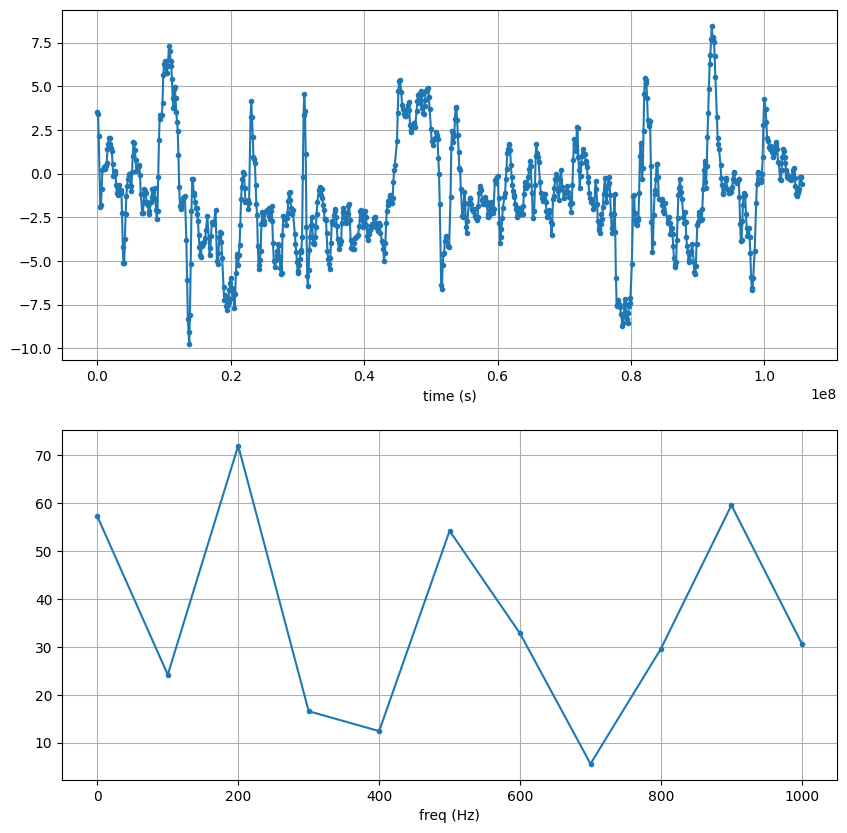

In [13]:
t = m2_fault10["TimeUS"]
y = m2_fault10["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

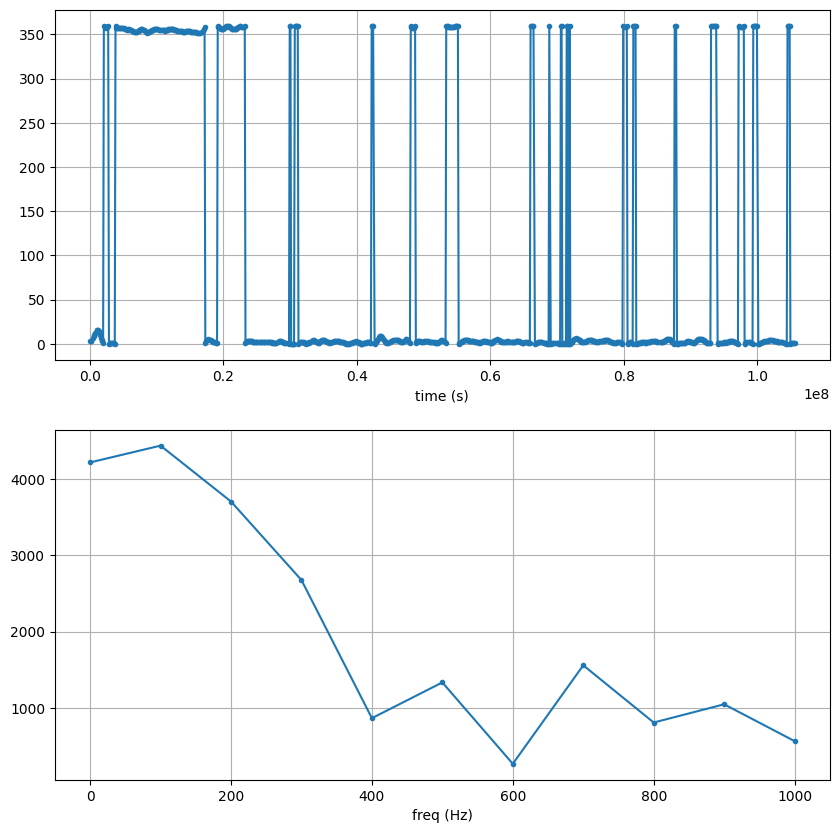

In [14]:
t = m2_fault10["TimeUS"]
y = m2_fault10["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

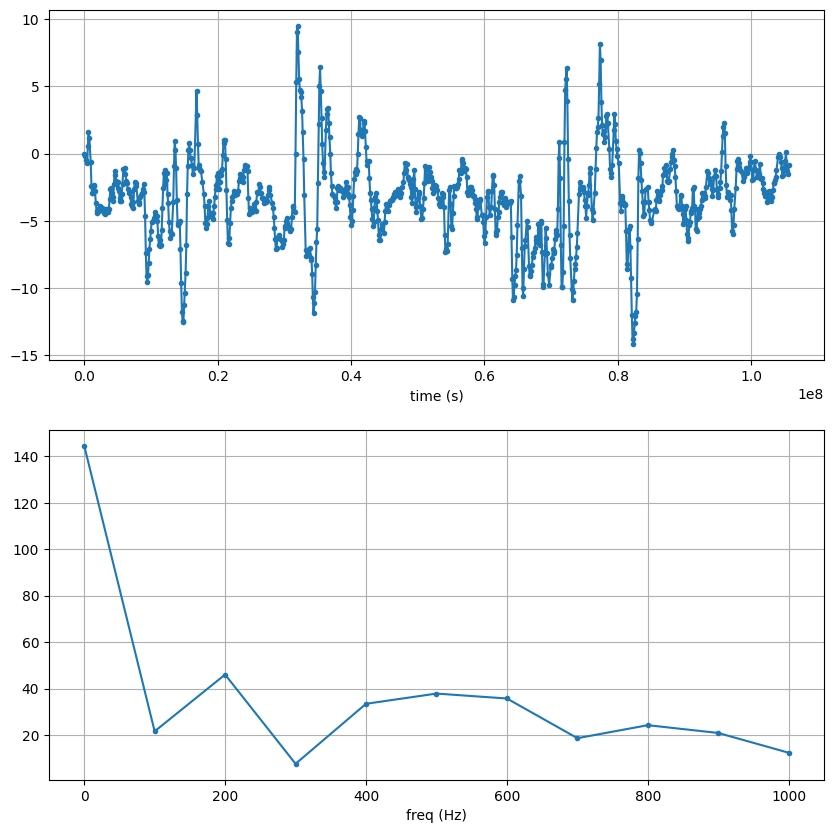

In [15]:
t = m2_fault10["TimeUS"]
y = m2_fault10["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

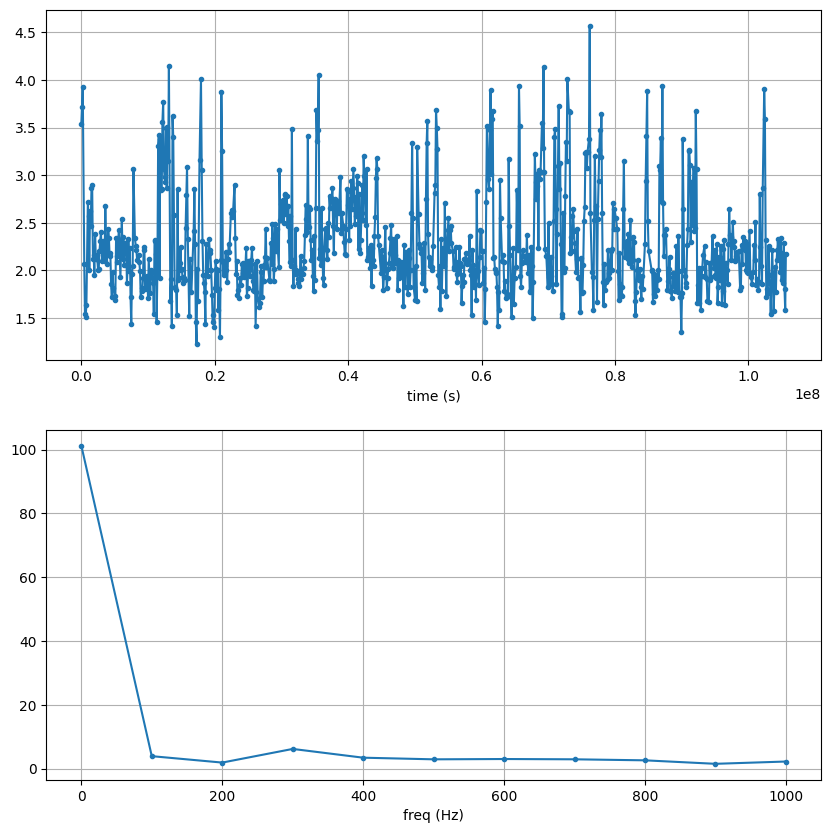

In [16]:
t = m2_fault10["TimeUS"]
y = m2_fault10["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

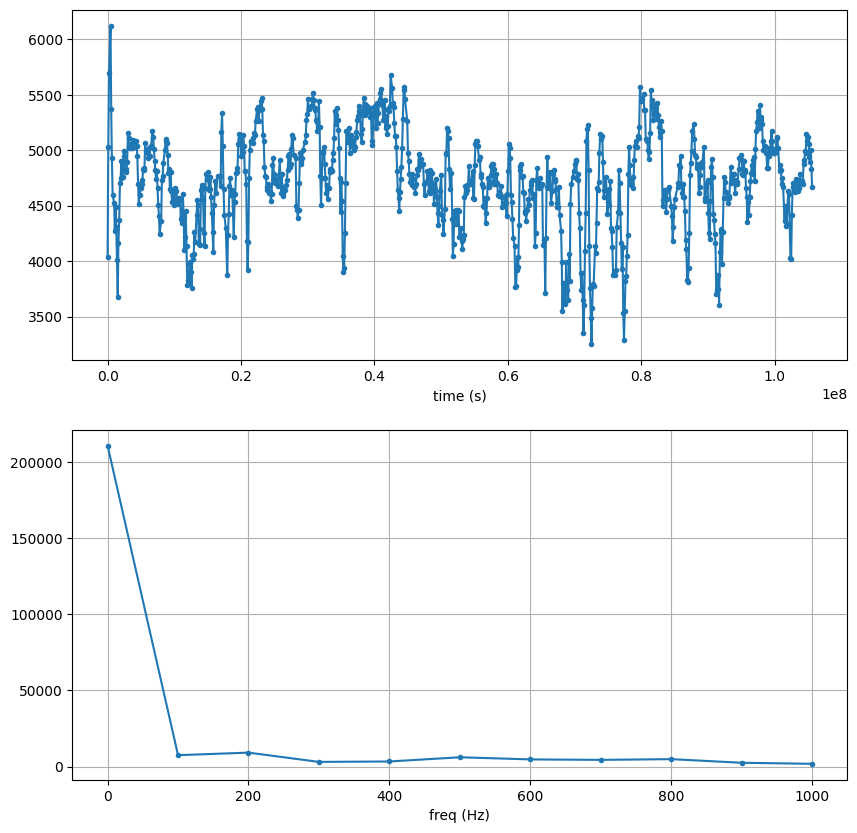

In [17]:
t = m2_fault10["TimeUS"]
y = m2_fault10["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

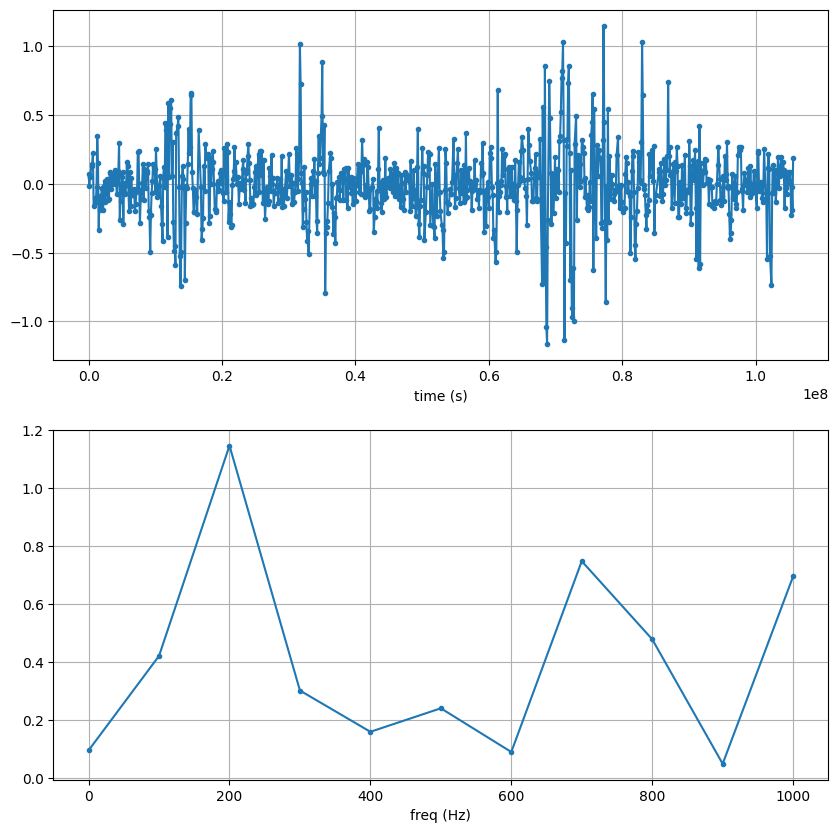

In [18]:
t = m2_fault10["TimeUS"]
y = m2_fault10["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

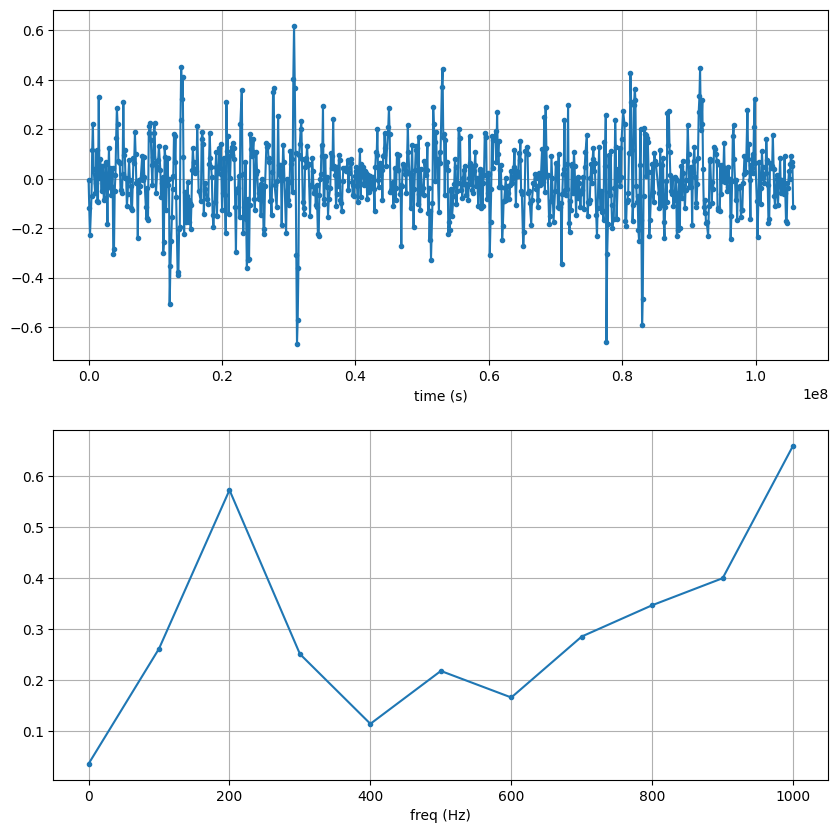

In [19]:
t = m2_fault10["TimeUS"]
y = m2_fault10["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

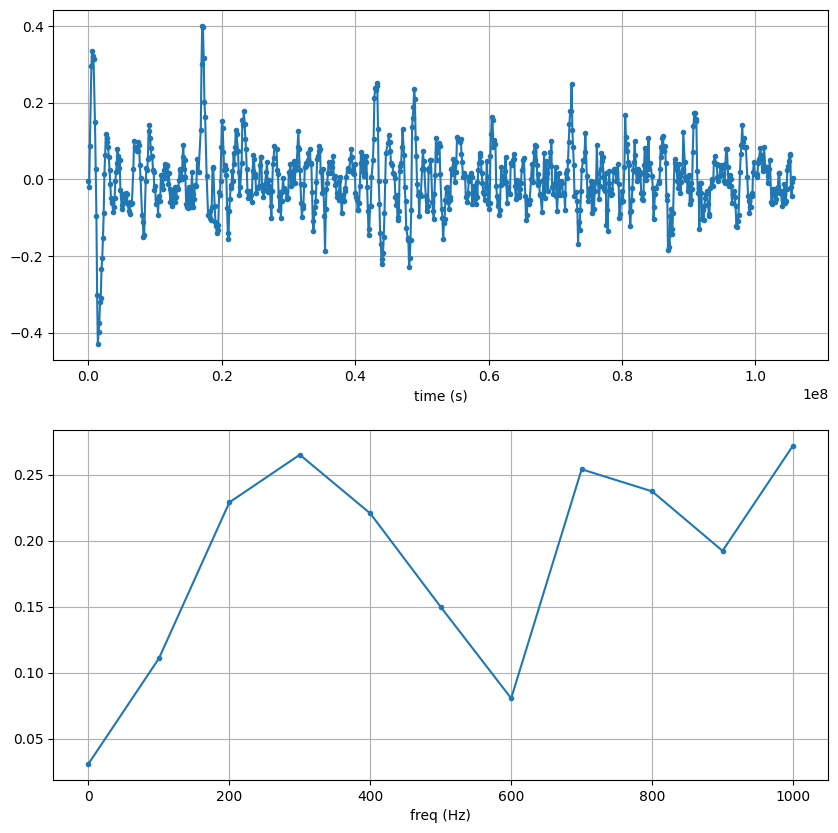

In [20]:
t = m2_fault10["TimeUS"]
y = m2_fault10["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

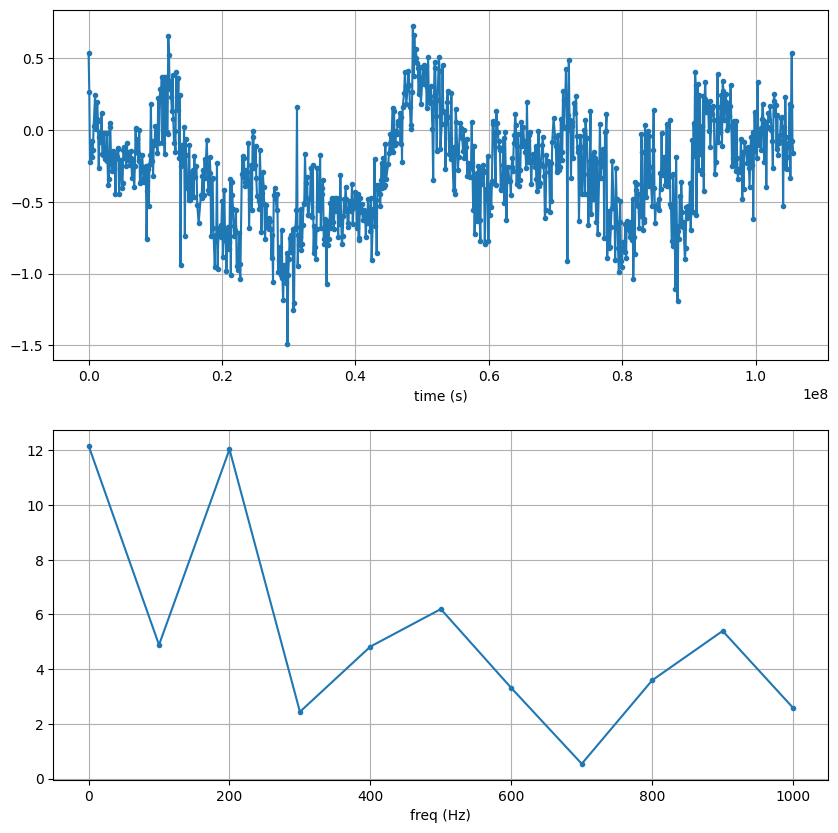

In [21]:
t = m2_fault10["TimeUS"]
y = m2_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

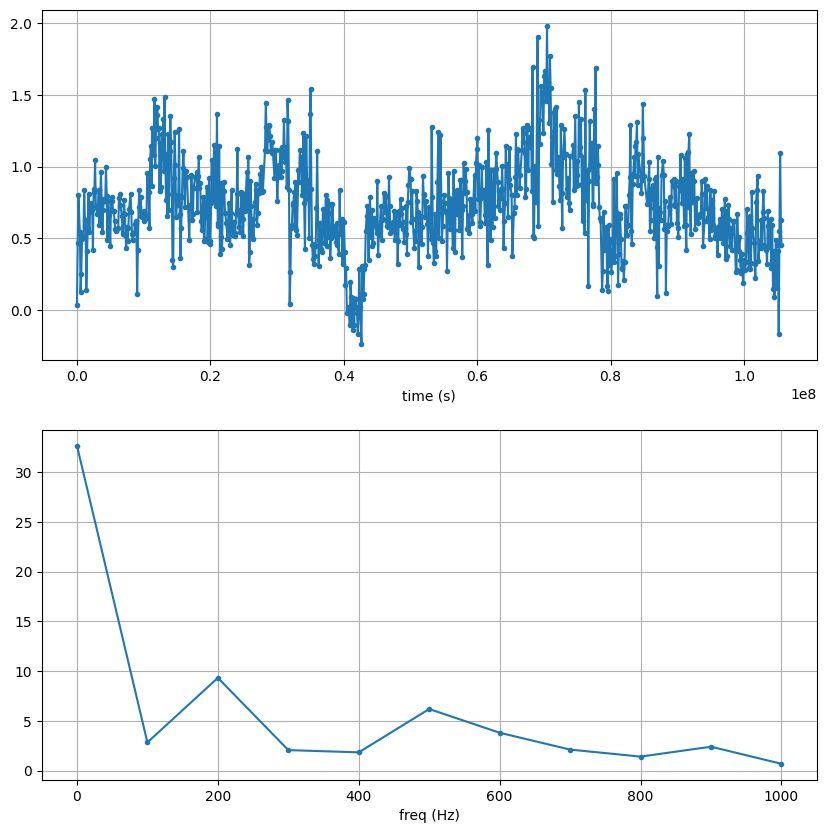

In [22]:
t = m2_fault10["TimeUS"]
y = m2_fault10["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

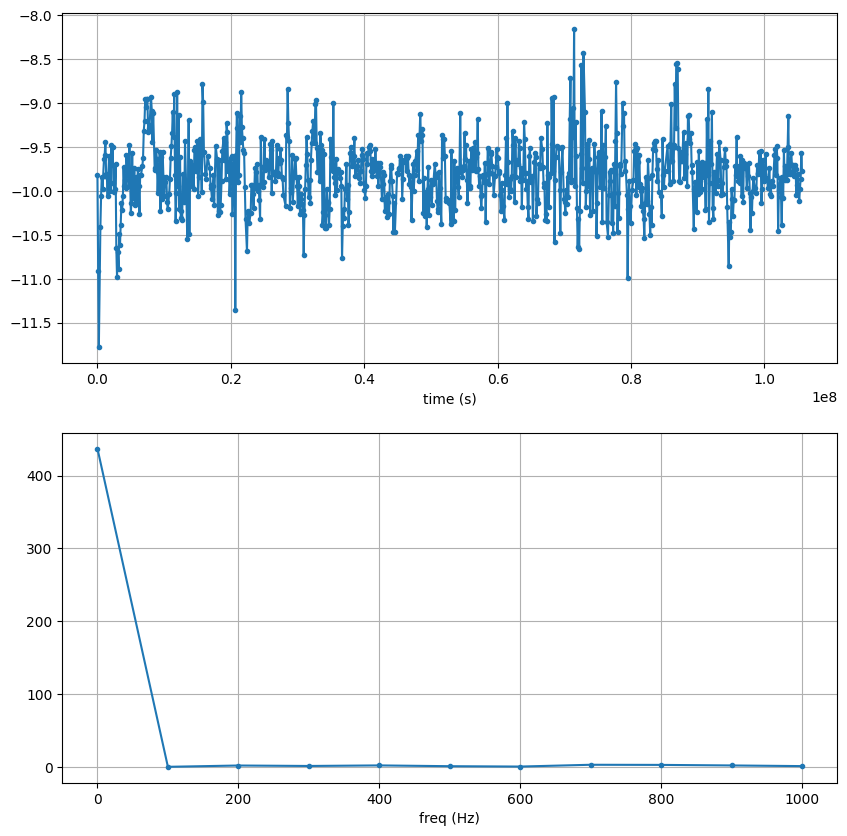

In [23]:
t = m2_fault10["TimeUS"]
y = m2_fault10["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()